<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/Python-Bayesian/200621_Bayesian_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Book: Numerical Python

import pymc3 as mc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
# Model definition

mu = 4.0
sigma = 2.0
model = mc.Model()

In [4]:
with model:
    mc.Normal('X', mu, tau=1/sigma**2)

In [5]:
model.vars

[X ~ Normal]

In [6]:
start = dict(X=2)
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

C:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [X]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 33 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [7]:
X = trace.get_values("X")

Text(0, 0.5, 'Probability distribution')

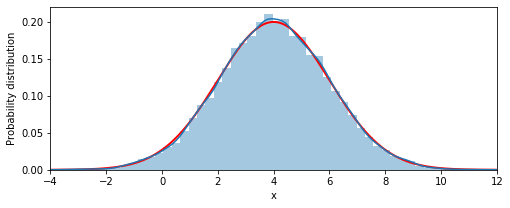

In [8]:
x = np.linspace(-4, 12, 1000)
y = stats.norm(mu, sigma).pdf(x)
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'r', lw=2)
sns.distplot(X, ax=ax)
ax.set_xlim(-4, 12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")

C:\Program Files\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


TypeError: plot_trace() got an unexpected keyword argument 'ax'

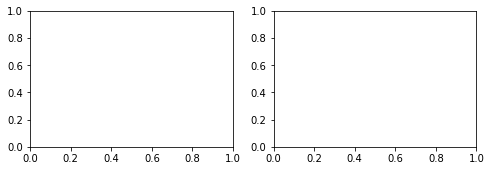

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5), squeeze=False)
mc.traceplot(trace, ax=axes)
axes[0, 0].plot(x, y, 'r', lw=0.5)

In [ ]:
model = mc.Model()
with model:
    mean = mc.Normal('mean', 3.0)
    sigma = mc.HalfNormal('sigma', sd=1.0)
    X = mc.Normal('X', mean, sd=sigma)

In [ ]:
model.vars

In [ ]:
with model:
    start = mc.find_MAP()
start

In [ ]:
with model:
    step = mc.Metropolis()
    trace = mc.sample(100000, start=start, step=step)

In [ ]:
trace.get_values('sigma').mean()

In [ ]:
X = trace.get_values('X')
X.mean()

In [ ]:
trace.get_values('X').std()

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace, varnames=['mean', 'sigma', 'X'], ax=axes)